### Author: [BEERAM SURYA CHANDRA](https://github.com/uniqueupsc/)
# Project 1 - Applied Statistics

**Data Description**: The data at hand contains medical costs of people characterized by certain attributes.

**Domain**: Healthcare

**Context**: Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information**
* **`age`**: age of primary beneficiary
* **`sex`**: insurance contractor gender, female, male
* **`bmi`**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`children`**: Number of children covered by health insurance / Number of dependents
* **`smoker`**: Smoking
* **`region`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
* **`charges`**: Individual medical costs billed by health insurance.

**Learning Outcomes**
* Exploratory Data Analysis
* Practicing statistics using Python
* Hypothesis testing

In [419]:
# installing the required libraries
# pip install pandas numpy scipy matplotlib seaborn statsmodels

In [420]:
# Importing packages
import pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.options.display.max_rows = 4000
from scipy.stats import chi2
from scipy.stats import skew as skew_stats

In [421]:
# Reading the data as a dataframe using pandas
insurance_dt    =   pd.read_csv('insurance_dataset.csv')

In [422]:
# first five rows of insurance dataframe
insurance_dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [423]:
# Printing out shape of the data
insurance_dt.shape

(1338, 7)

In [424]:
# Data type of each attribute
insurance_dt.dtypes

age           int64
sex             str
bmi         float64
children      int64
smoker          str
region          str
charges     float64
dtype: object

Numeric attributes: `age`, `bmi`, `children`, `charges`

Object attributes: `sex`, `smoker`, `region`

In [425]:
# Checking the presence of missing values
insurance_dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset has no null values

In [426]:
# Five point summary of numerical attributes
insurance_dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Measure of CT (3Ms) and Distributions

Measure of central tendency describes the entire dataset with a single value or metric which represents the middle or center of distribution. It is also known as measure of center or central location.

Determining 3Ms and checking the distribution of `age`, `bmi` and `charges` columns

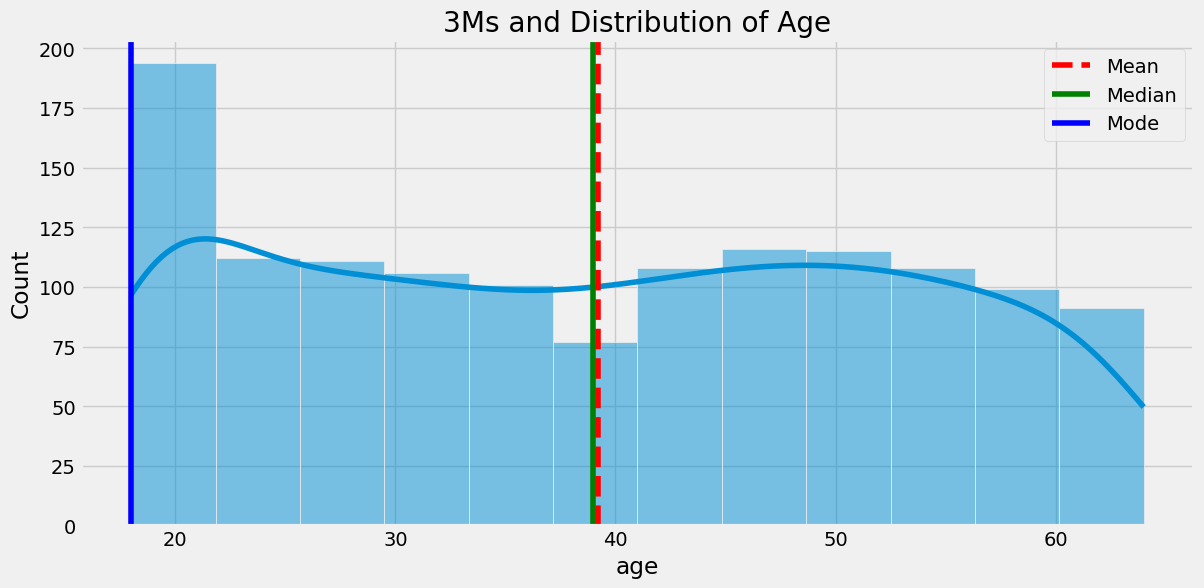

In [427]:
# Distribution of 'Age' alongwith measure of CT (3Ms)
age_mean            = insurance_dt['age'].mean()
age_median          = insurance_dt['age'].median()
age_mode            = insurance_dt['age'].mode()

fig, ax_hist        = plt.subplots(figsize = (12.8, 6))
ax_hist             = sns.histplot(insurance_dt['age'], kde=True)

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')

ax_hist.set_title('3Ms and Distribution of Age')

plt.legend(); plt.show()

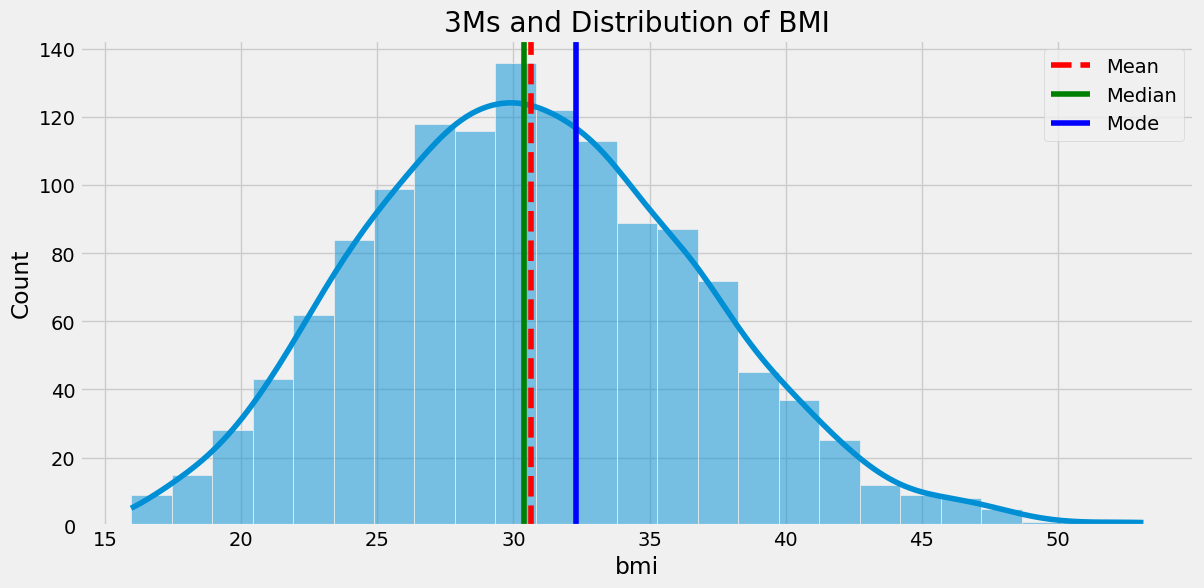

In [428]:
# Distribution of 'BMI' alongwith measure of CT (3Ms)
bmi_mean            = insurance_dt['bmi'].mean()
bmi_median          = insurance_dt['bmi'].median()
bmi_mode            = insurance_dt['bmi'].mode()

fig, ax_hist        = plt.subplots(figsize = (12.8, 6))
ax_hist             = sns.histplot(insurance_dt['bmi'], kde=True)

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of BMI')

plt.legend(); plt.show()

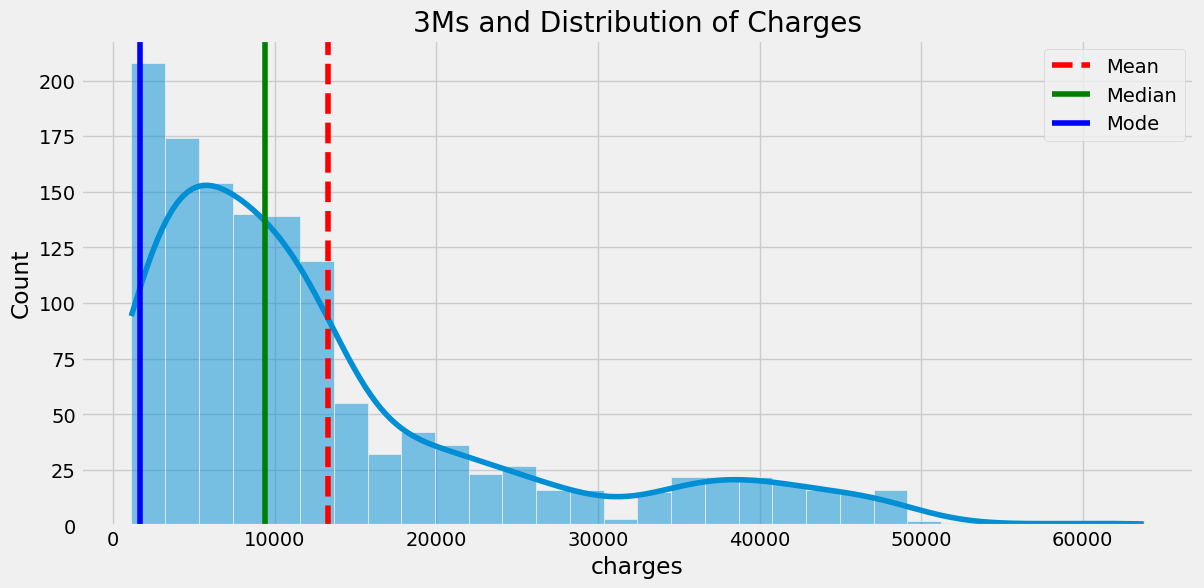

In [429]:
# Distribution of 'Charges' alongwith measure of CT (3Ms)
charges_mean        = insurance_dt['charges'].mean()
charges_median      = insurance_dt['charges'].median()
charges_mode        = insurance_dt['charges'].mode()

fig, ax_hist        = plt.subplots(figsize = (12.8, 6))
ax_hist             = sns.histplot(insurance_dt['charges'], kde=True)

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of Charges')

plt.legend(); plt.show()

### Measure of skewness
Skewness is a measure of extent to which a distribution differs from a normal distribution.

The rule of thumb I would use here:
* If the skewness is between -0.5 and 0.5, the data are **fairly symmetrical**
* If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are **moderately skewed**
* If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are **highly skewed**

Determining skewness of `age`, `bmi` and `charges` columns and ploting the results after fitting a norm distribution

### ✅ Skewness Value Interpretation (Industry Standard)

| # | Skewness Value       | Interpretation                     |
|---|----------------------|------------------------------------|
| 1 | ≈ 0                  | Symmetric distribution             |
| 2 | -0.5 to +0.5         | Approximately symmetric            |
| 3 | +0.5 to +1           | Moderately right-skewed            |
| 4 | -1 to -0.5           | Moderately left-skewed             |
| 5 | > +1                 | Highly right-skewed                |
| 6 | < -1                 | Highly left-skewed                 |

In [430]:
# Measure of Skewness and kurtosis for 'age', 'bmi' and 'charges' columns
print("Skewness of 'Age': {}\n".format(insurance_dt['age'].skew().round(4)))

print("Skewness of 'BMI': {}\n".format(insurance_dt['bmi'].skew().round(4)))

print("Skewness of 'Charges': {}\n".format(insurance_dt['charges'].skew().round(4)))

Skewness of 'Age': 0.0557

Skewness of 'BMI': 0.284

Skewness of 'Charges': 1.5159



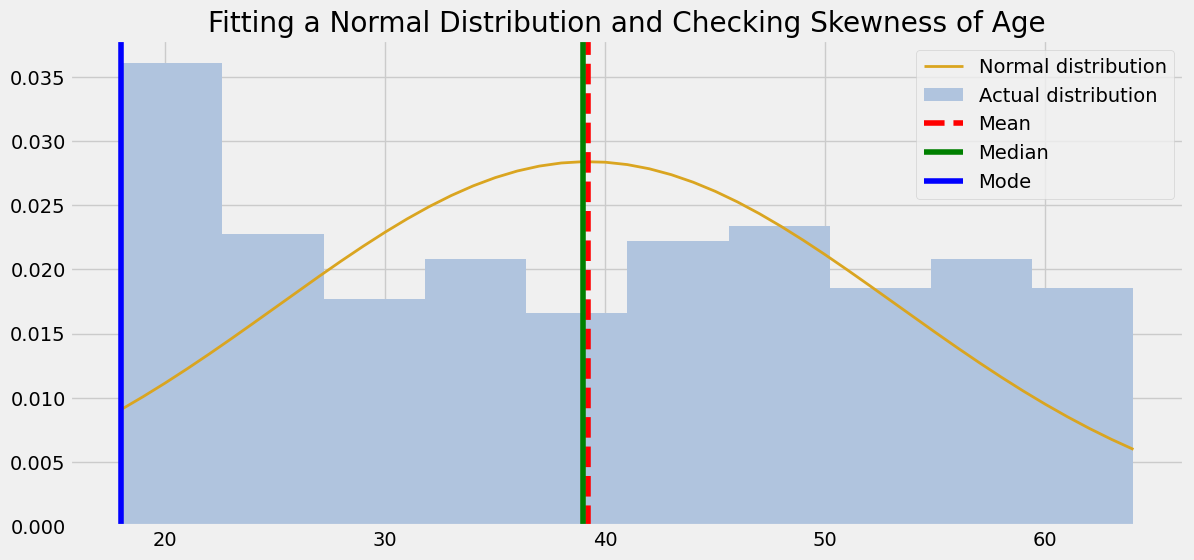

Skewness of Age: 0.0556


In [431]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance_dt['age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of Age')

plt.legend(); plt.show()

age_skewness = skew_stats(insurance_dt['age'])
print(f"Skewness of Age: {age_skewness:.4f}");

We can see in the above graph that **`age`** is **positively (right, Mode < Median < Mean) skewed** with **skewness score 0.056 (fairly symmetrical)**.

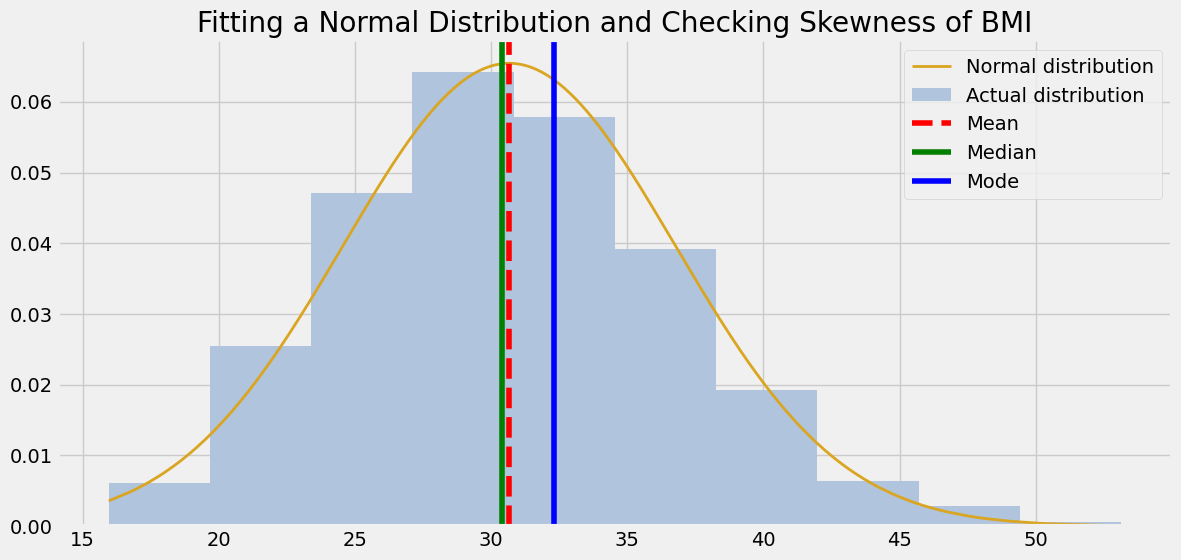

Skewness of BMI: 0.2837


In [432]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance_dt['bmi'])
h = sorted(h)
 
bmi_skewness = skew_stats(insurance_dt['bmi'])

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of BMI')

plt.legend(); plt.show()

print(f"Skewness of BMI: {bmi_skewness:.4f}");

We can see in the above graph that **`bmi`** is **positively (right, median < mean)** skewed with **skewness score 0.284 (fairly symmetrical)**.

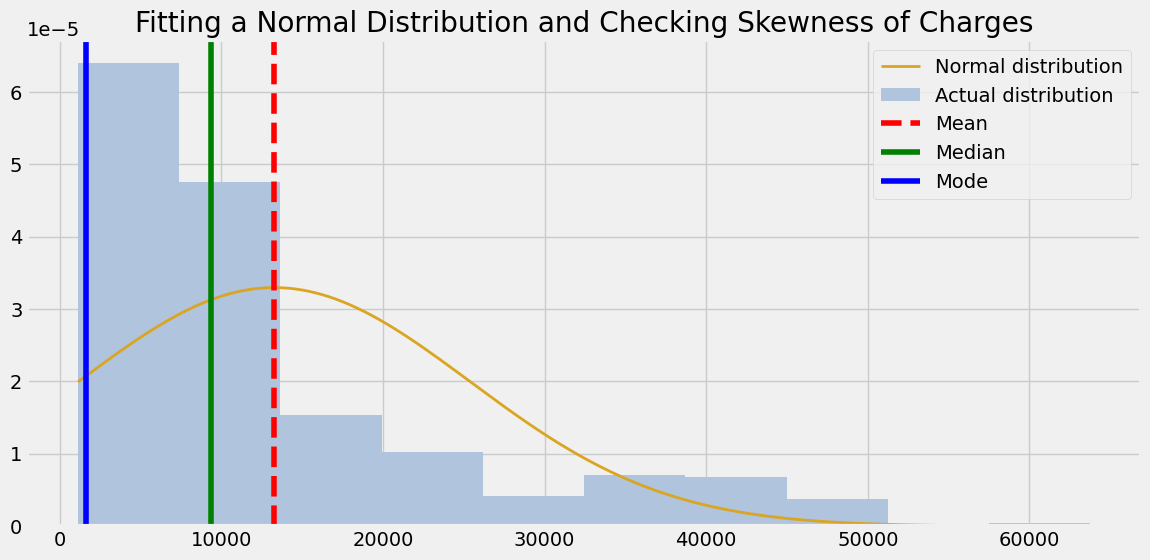

Skewness of Charges: 1.5142


In [433]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance_dt['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of Charges')

plt.legend(); plt.show()

charges_skewness = skew_stats(insurance_dt['charges'])
print(f"Skewness of Charges: {charges_skewness:.4f}");

We can see in the above graph that **`charges`** is **positively (right, mode < median < mean)** skewed with **skewness score 1.514 (highly skewed)**.

### Outliers
In statistics, an outlier is an observation point that is distant from other observations.

**Ways to detect outliers**
* ***Box Plot***: In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

* ***Scatter Plot***: A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

* ***Z-score***: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

* ***IQR score***: The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

I would be using Boxplot (to visualize), IQR (to display the columns) for outliers

,age,sex,bmi,children,smoker,region,charges


Text(0.5, 1.0, 'Outlier in Age')

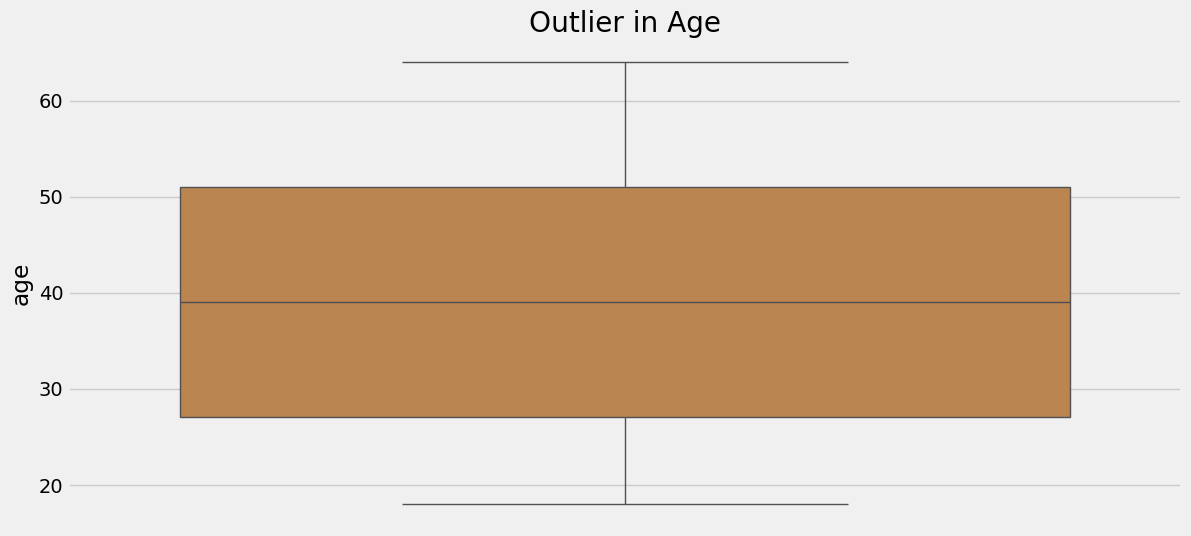

In [434]:
# Outliers in Age
Q3 = insurance_dt['age'].quantile(0.75)
Q1 = insurance_dt['age'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance_dt.loc[(insurance_dt['age'] < (Q1 - 1.5 * IQR)) | (insurance_dt['age'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8 , 6))
sns.boxplot(y = insurance_dt['age']  , color='peru').set_title('Outlier in Age')

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


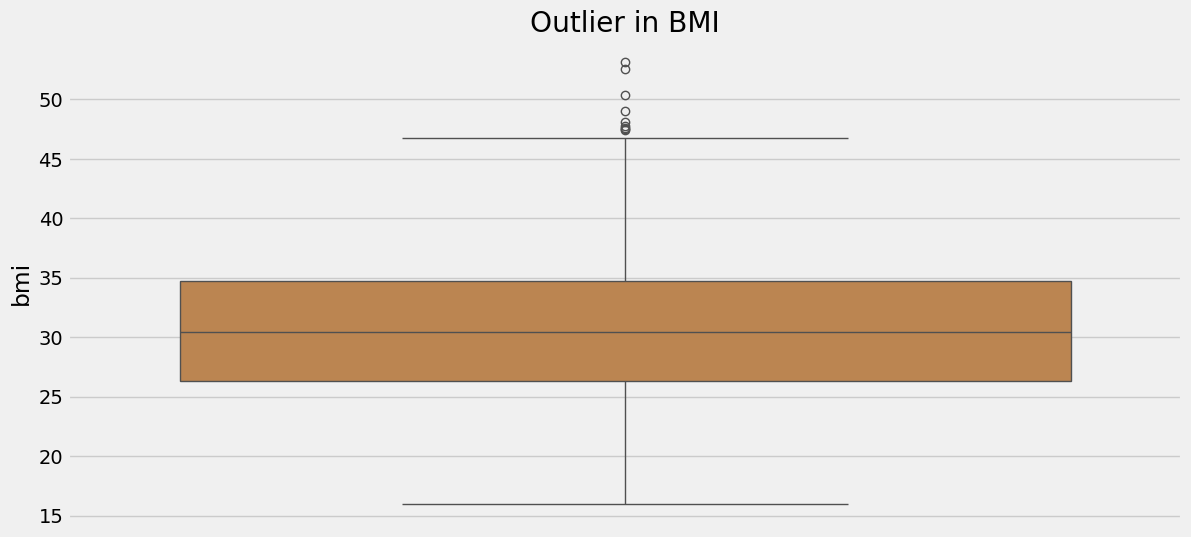

In [435]:
# Outliers in BMI
Q3 = insurance_dt['bmi'].quantile(0.75)
Q1 = insurance_dt['bmi'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance_dt.loc[(insurance_dt['bmi'] < (Q1 - 1.5 * IQR)) | (insurance_dt['bmi'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8 , 6))

sns.boxplot( y=insurance_dt['bmi'], color = 'peru').set_title('Outlier in BMI');




,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


Text(0.5, 1.0, 'Outlier in Charges Using Boxplot')

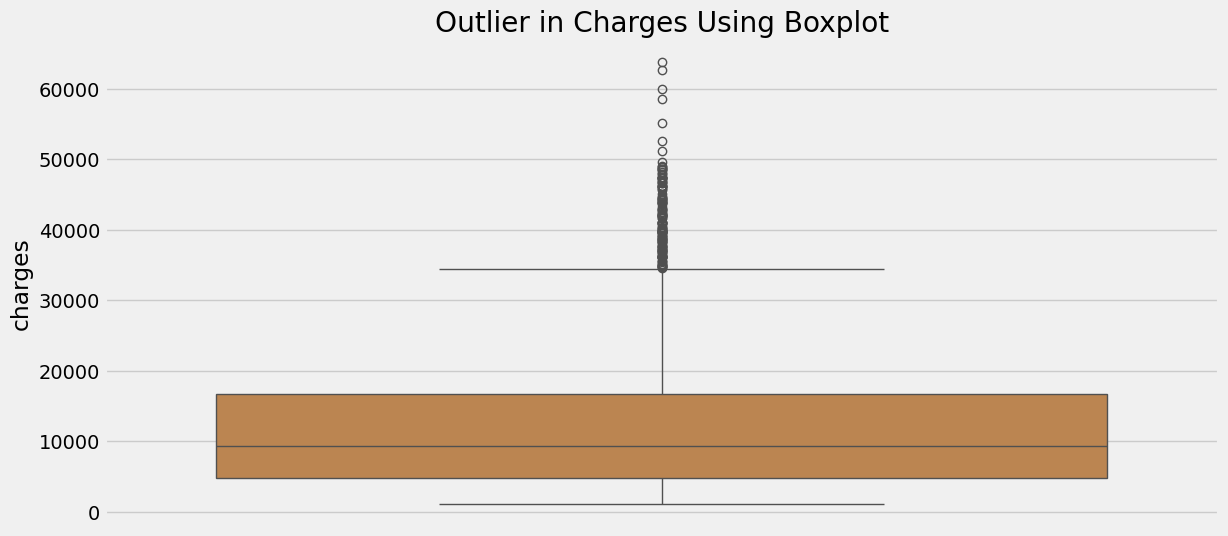

In [436]:
# Outliers in Charges
Q3 = insurance_dt['charges'].quantile(0.75)
Q1 = insurance_dt['charges'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance_dt.loc[(insurance_dt['charges'] < (Q1 - 1.5 * IQR)) | (insurance_dt['charges'] > (Q3 + 1.5 * IQR))].head(5))

plt.figure(figsize = (12.8 , 6))
sns.boxplot(y=insurance_dt['charges'], color = 'peru').set_title('Outlier in Charges Using Boxplot')



`age` column has no outliers while the columns such as `bmi` and `charges` have the outliers

### Distribution of categorical columns (including children)

In [437]:
# Convert children to categorical
insurance_dt['children']    = pd.Categorical(insurance_dt['children'])

# Replace non-smoker with 0 and smoker with 1
insurance_dt['smoker']      = insurance_dt['smoker'].replace({'no': 0, 'yes': 1})

# Replace male with 1 and female with 0
insurance_dt['sex']         = insurance_dt['sex'].replace({'female': 0, 'male': 1})

<Axes: xlabel='sex'>

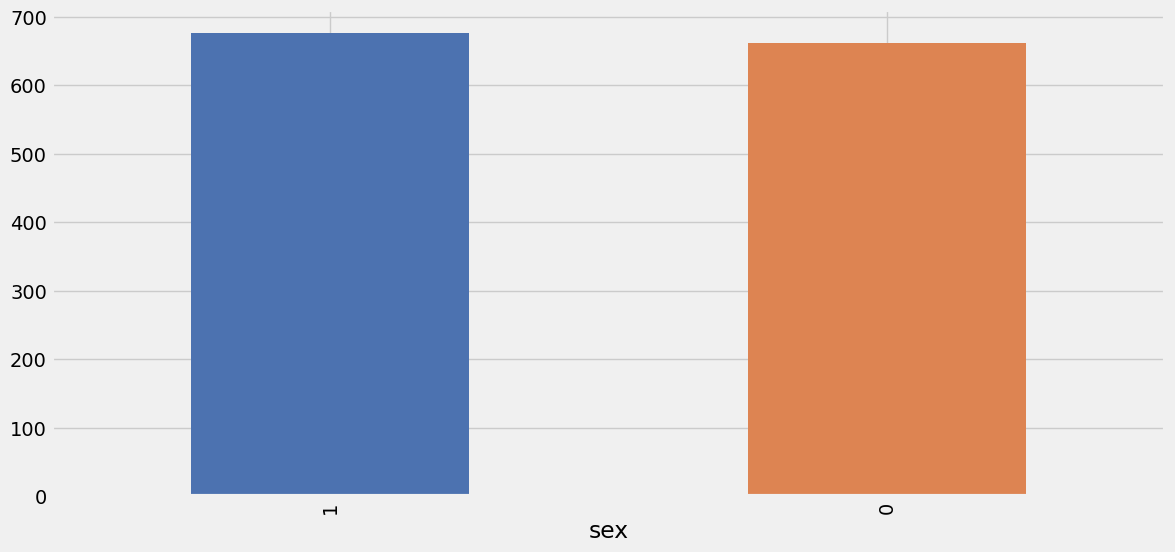

In [438]:
# Distribution of sex - Male - 1, Female - 0
plt.figure(figsize = (12.8 , 6))

insurance_dt['sex'].value_counts().plot.bar(color = sns.color_palette('deep', 2))

<Axes: xlabel='children'>

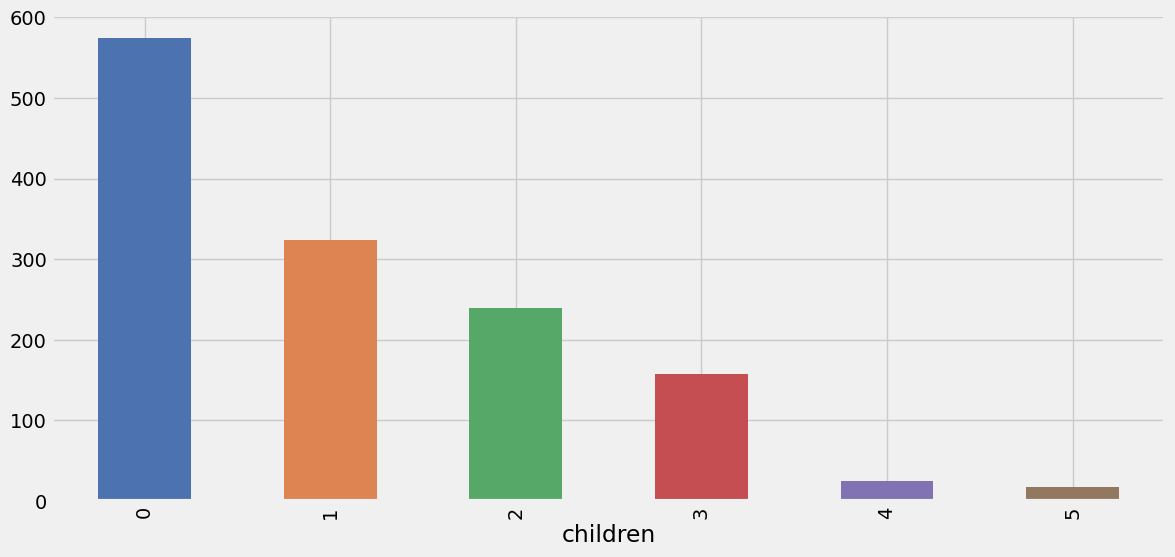

In [439]:
# Distribution of children
plt.figure(figsize = (12.8 , 6))

insurance_dt['children'].value_counts().plot.bar(color = sns.color_palette('deep', 6))

<Axes: xlabel='region'>

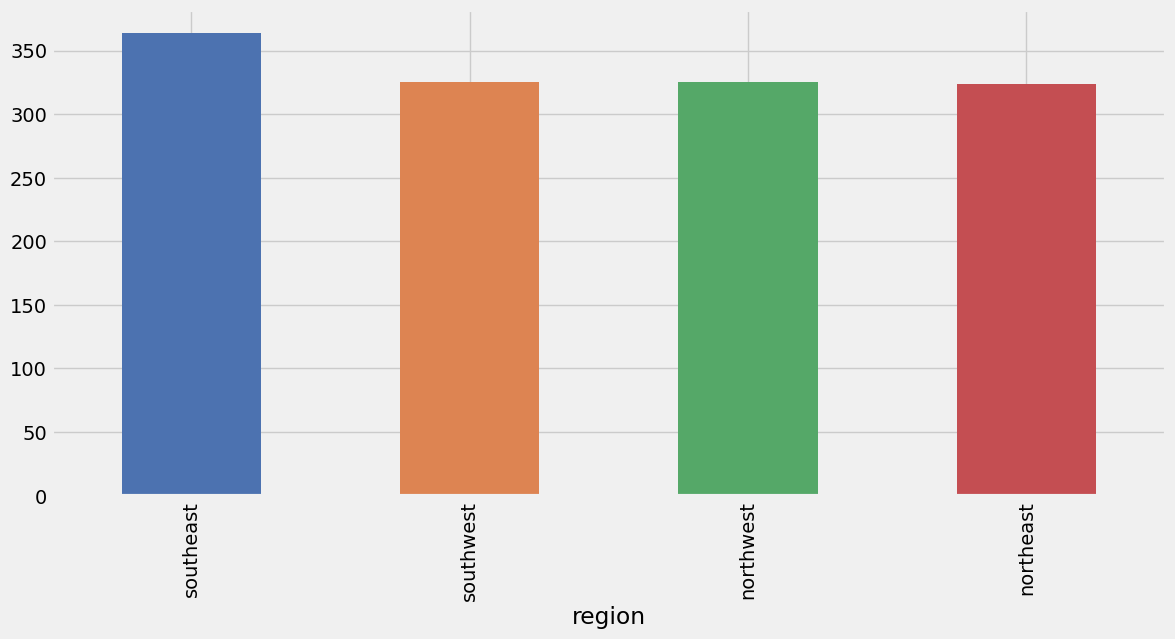

In [440]:
# Distribution of region
plt.figure(figsize = (12.8 , 6))

insurance_dt['region'].value_counts().plot.bar(color = sns.color_palette('deep', 4))

Text(0.5, 1.0, 'Count of Smokers by Sex')

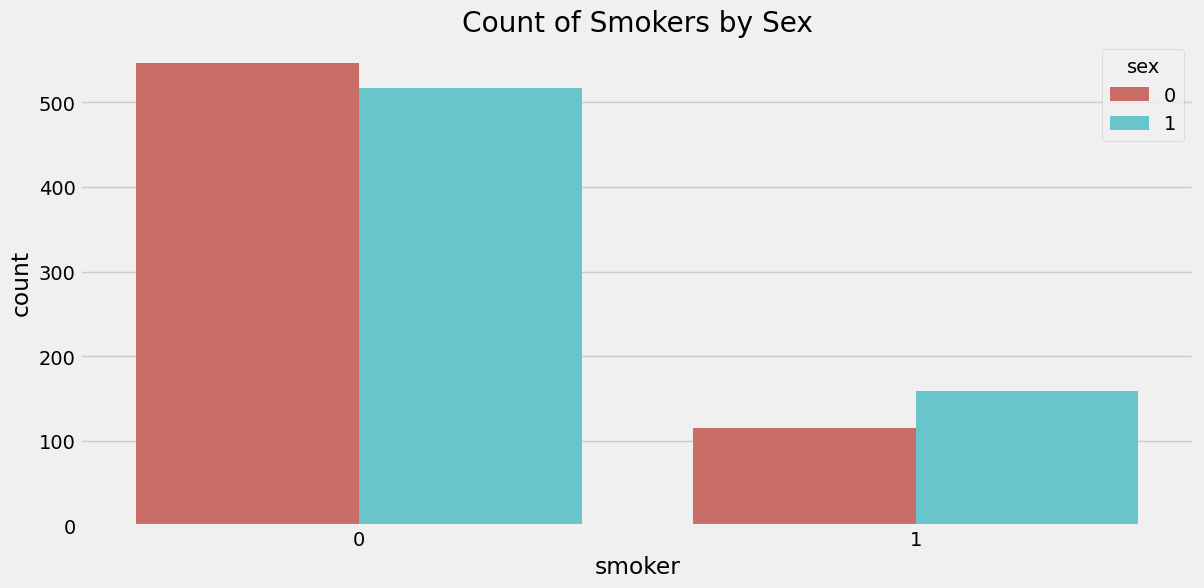

In [441]:
# Count of smokers vs sex, Male - 1, Female - 0
fig = plt.figure(figsize = (12.8, 6))

sns.countplot(x = 'smoker', hue = 'sex', palette = 'hls', data = insurance_dt).set_title('Count of Smokers by Sex')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

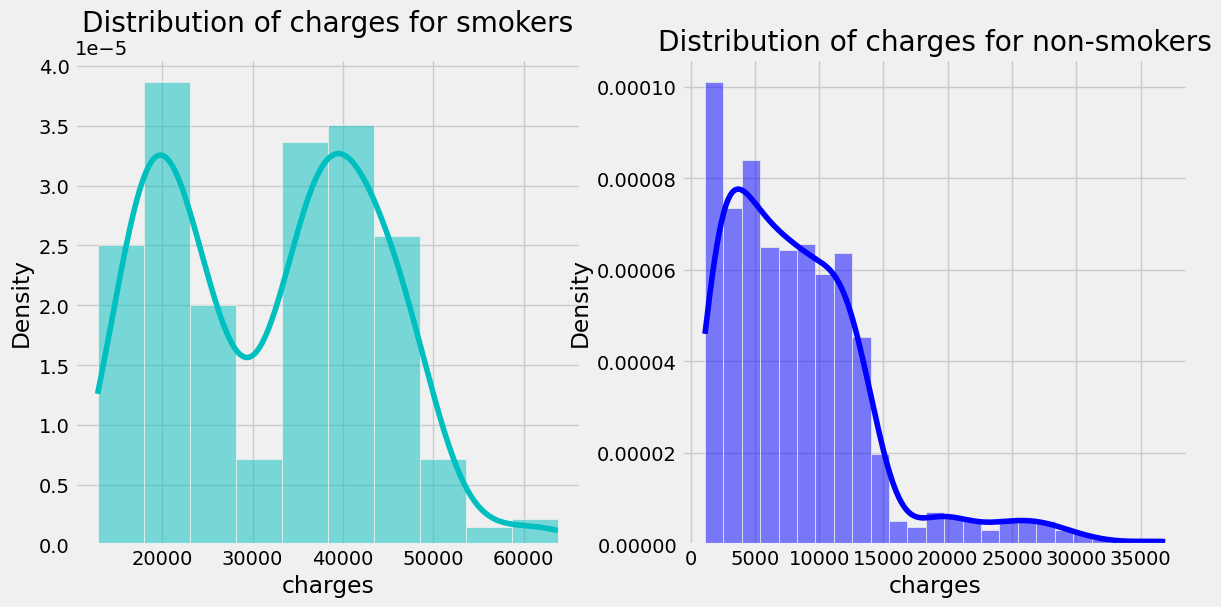

In [442]:
# Distribution of charges for smokers category
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.histplot(
    insurance_dt[insurance_dt['smoker'] == 1]['charges'],
    kde=True, stat='density', color='c', ax=ax
).set_title('Distribution of charges for smokers')

ax = fig.add_subplot(122)
sns.histplot(
    insurance_dt[insurance_dt['smoker'] == 0]['charges'],
    kde=True , stat='density', color='b', ax=ax
).set_title('Distribution of charges for non-smokers')



Text(0.5, 1.0, 'Count of Smoker for Age >18 by Sex')

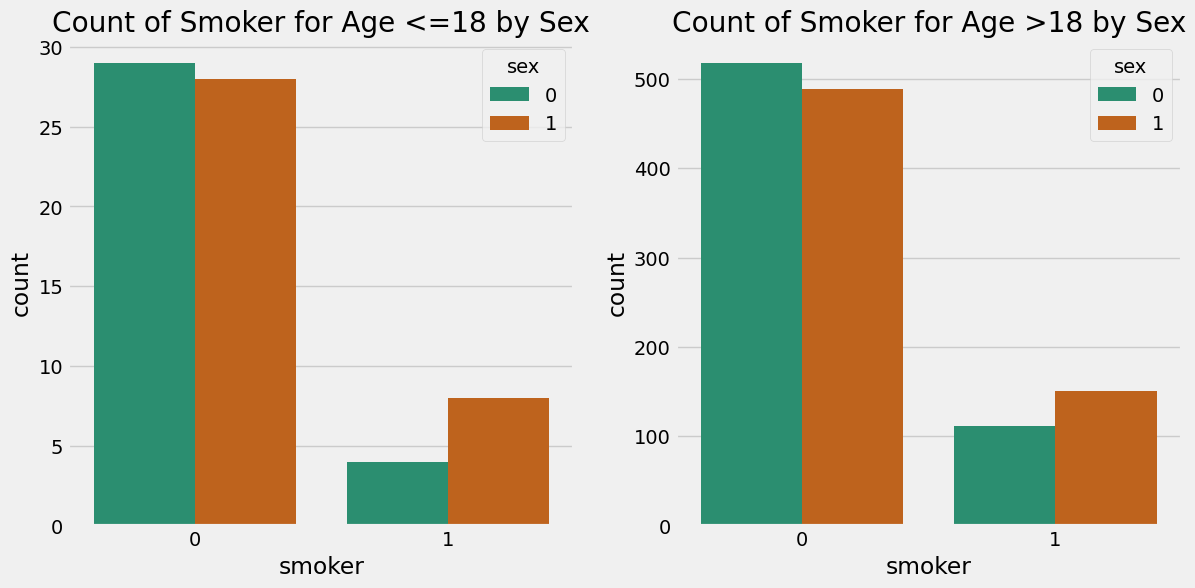

In [443]:
# Count of smokers vs age (<18 and >18)
# Sex: Male - 1, Female - 0
fig = plt.figure(figsize = (12.8, 6))

ax = fig.subplots(1, 2)
sns.countplot(x = 'smoker', hue = 'sex', palette = 'Dark2', 
                  data = insurance_dt[(insurance_dt['age'] <= 18)], ax = ax[0]).set_title('Count of Smoker for Age <=18 by Sex')

sns.countplot(x = 'smoker', hue = 'sex', palette = 'Dark2', 
                  data = insurance_dt[(insurance_dt['age'] > 18)], ax = ax[1]).set_title('Count of Smoker for Age >18 by Sex')

Text(0.5, 1.0, 'Distribution of Charges for Male and Female by Smoker and Non-smokers')

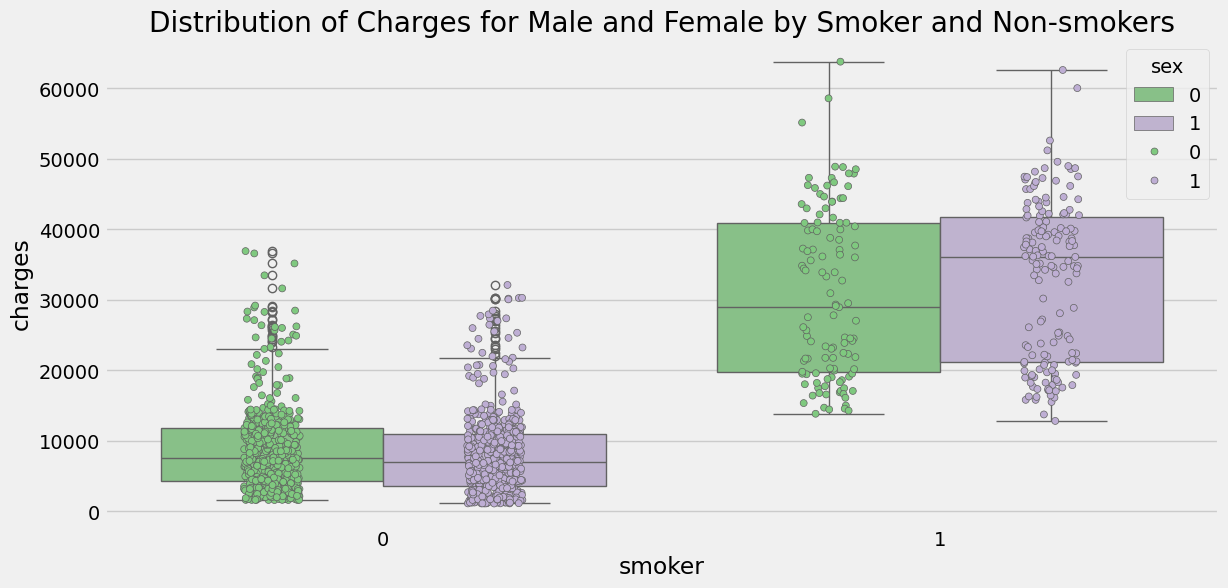

In [444]:
# Distribution of charges for male and female smoker and non-smokers

fig = plt.figure(figsize = (12.8, 6))

ax = sns.boxplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = insurance_dt)
ax = sns.stripplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = insurance_dt, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Charges for Male and Female by Smoker and Non-smokers')

Text(0.5, 1.0, 'Distribution of Charges by Number of Children')

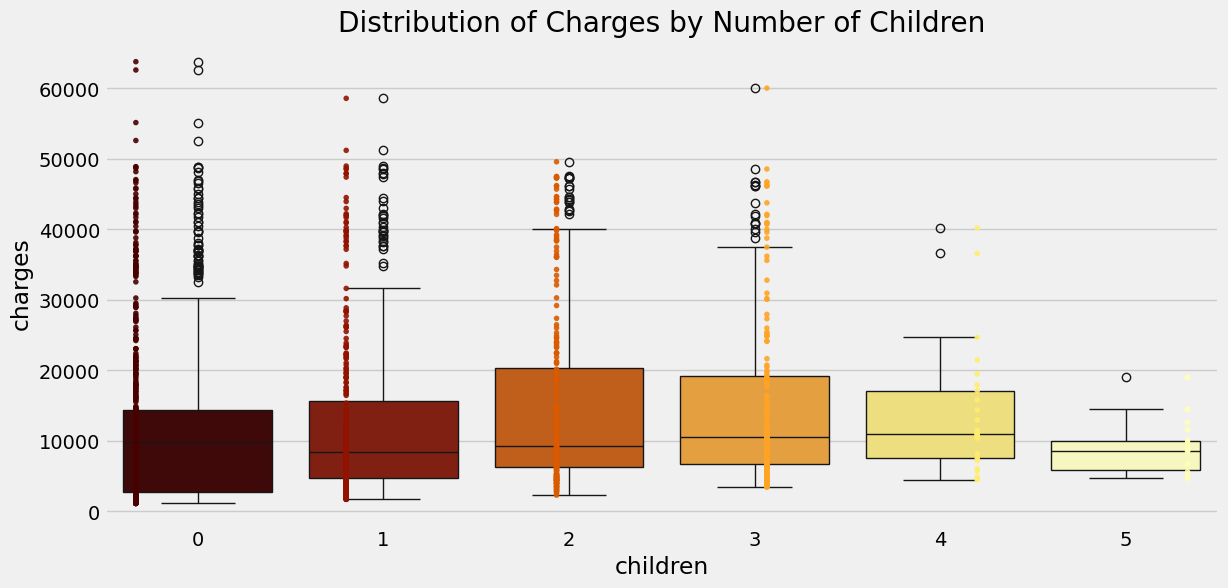

In [445]:
plt.figure(figsize=(12.8, 6))

ax = sns.boxplot(
    x='children', y='charges',
    hue='children', data=insurance_dt,
    palette='afmhot', dodge=False, legend=False
)

sns.stripplot(
    x='children', y='charges',
    hue='children', data=insurance_dt,
    palette='afmhot', dodge=True,
    jitter=False, alpha=0.9, size=4, legend=False
)

ax.set_title('Distribution of Charges by Number of Children')
